In [3]:
import json
import urllib
import pickle
from tqdm.auto import tqdm
import pandas as pd
import plotly.express as px
from pipe import *
from newspaper import Article, ArticleException
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

tqdm.pandas()

In [7]:
CRYPTONEWS_API_ENDPOINT = "https://cryptonews-api.com/api/v1"
CRYPTONEWS_API_TOKEN = "oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb"
NEWS_SOURCES = [
    "Altcoin Buzz",
    "AMBCrypto",
    "BeInCrypto",
    "Benzinga",
    "Bitcoin",
    "Bitcoin Market Journal",
    "Bitcoin Magazine",
    "Bitcoinist",
    "Bit News",
    "Blockgeeks",
    "Blockonomi",
    "Bloomberg Markets and Finance",
    "Bloomberg Technology",
    "BTCManager",
    "Business Insider",
    "CNBC",
    "CNBC Television",
    "CNN",
    "Coinbureau",
    "Coindesk",
    "Coindoo",
    "Coinfomania",
    "Coingape",
    "Coin Idol",
    "CoinMarketCap",
    "Coin News Asia",
    "Coinnounce",
    "Crypto Briefing",
    "Crypto Daily",
    "Crypto Economy",
    "CryptoNews",
    "CryptoNinjas",
    "Cryptopolitan",
    "CryptoPotato",
    "Crypto Reporter",
    "CryptoSlate",
    "CryptoTicker",
    "Cryptoverze",
    "DailyFX",
    "DCForecasts",
    "Decrypt",
    "FinanceMagnates",
    "Forbes",
    "Fox Business",
    "InvestingCube",
    "Investorplace",
    "Koinpost",
    "Modern Consensus",
    "NewsBTC",
    "Reuters",
    "The Block",
    "TCU",
    "The Cryptonomist",
    "The Currency Analytics",
    "The Daily Hodl",
    "The Motley Fool",
    "Trustnode",
    "UToday",
    "Yahoo Finance",
    "8BTC",
]

In [16]:
def encode_datetime_range(start, end=None):
    if end is None:
        end = pd.Timestamp.now()
    start_date, start_time = start.strftime("%m%d%Y %H%M%S").split()
    end_date, end_time = end.strftime("%m%d%Y %H%M%S").split()
    return {
        "date": f"{start_date}-{end_date}",
        "time": f"{start_time}-{end_time}"
    }

def fetch_page(tickers, start, end, source, items, page):
    params = {"tickers": ",".join(tickers), 
              "token": CRYPTONEWS_API_TOKEN,
              "items": items,
              "page": page}
    if start is not None:
        params["date"] = encode_datetime_range(start, end)["date"]
    if source is not None:
        params["source"] = ",".join(source)
    paramstr = urllib.parse.urlencode(params)
    print(paramstr)
    data = urllib.request.urlopen(f"{CRYPTONEWS_API_ENDPOINT}?{paramstr}").read()
    df = pd.DataFrame(json.loads(data)['data'])
    if len(df) == 0:
        return None
    df["date"] = pd.to_datetime(df["date"])
    return df

In [24]:
urllib.request.urlopen(f"{CRYPTONEWS_API_ENDPOINT}?tickers=SOL&token=oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb&items=50&page=2&date=02172022-02222022&source=Altcoin+Buzz%2CAMBCrypto%2CBeInCrypto%2CBenzinga%2CBitcoin%2CBitcoin+Market+Journal%2CBitcoin+Magazine%2CBitcoinist%2CBit+News%2CBlockgeeks%2CBlockonomi%2CBloomberg+Markets+and+Finance%2CBloomberg+Technology%2CBTCManager%2CBusiness+Insider%2CCNBC%2CCNBC+Television%2CCNN%2CCoinbureau%2CCoindesk%2CCoindoo%2CCoinfomania%2CCoingape%2CCoin+Idol%2CCoinMarketCap%2CCoin+News+Asia%2CCoinnounce%2CCrypto+Briefing%2CCrypto+Daily%2CCrypto+Economy%2CCryptoNews%2CCryptoNinjas%2CCryptopolitan%2CCryptoPotato%2CCrypto+Reporter%2CCryptoSlate%2CCryptoTicker%2CCryptoverze%2CDailyFX%2CDCForecasts%2CDecrypt%2CFinanceMagnates%2CForbes%2CFox+Business%2CInvestingCube%2CInvestorplace%2CKoinpost%2CModern+Consensus%2CNewsBTC%2CReuters%2CThe+Block%2CTCU%2CThe+Cryptonomist%2CThe+Currency+Analytics%2CThe+Daily+Hodl%2CThe+Motley+Fool%2CTrustnode%2CUToday%2CYahoo+Finance%2C8BTC").read()

b'{\n    "data": [],\n    "error": "No News Found - Please use our fallback feature to avoid empty responses."\n}'

In [21]:
fetch_page(["SOL"], pd.Timestamp.now() - pd.DateOffset(days=10), pd.Timestamp.now(), None, 50, 3)

tickers=SOL&token=oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb&items=50&page=3&date=02172022-02272022


In [22]:
end = None
results = []
page = 1
while (df := fetch_page(tickers=["sol"], 
                        start=pd.Timestamp.now() - pd.DateOffset(days=10), 
                        end=pd.Timestamp.now(), 
                        source=None,
                        items=50,
                        page=page)) is not None:
    results.append(df)
    page += 1
    end = df["date"].min()
    print(end)
if len(results) > 0:
    data = pd.concat(results).reset_index(drop=True)

tickers=sol&token=oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb&items=50&page=1&date=02172022-02272022
2022-02-22 17:26:00-05:00
tickers=sol&token=oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb&items=50&page=2&date=02172022-02272022
2022-02-17 06:00:38-05:00
tickers=sol&token=oonymosrym98pjbpimxrmzv0yqoiotvlqcmprqzb&items=50&page=3&date=02172022-02272022


In [23]:
data

,news_url,image_url,title,text,source_name,date,topics,sentiment,type,tickers
0,https://thecurrencyanalytics.com/altcoins/alfp...,https://crypto.snapi.dev/images/v1/1/s/solana-...,Alfprotocol on Solana (SOL) Network To Increas...,Catch up on the latest crypto market news at T...,The Currency Analytics,2022-02-27 20:30:30-05:00,[],Neutral,Article,[SOL]
1,https://ambcrypto.com/will-sol-outpace-its-per...,https://crypto.snapi.dev/images/v1/0/l/pexels-...,Will NFTs help SOL outpace its performance to ...,"At press time, Solana [SOL] was changing hands...",AMBCrypto,2022-02-27 14:30:00-05:00,[NFT],Positive,Article,[SOL]
2,https://www.cryptopolitan.com/bitcoin-ethereum...,https://crypto.snapi.dev/images/v1/5/t/5tg222-...,"Bitcoin, Ethereum, Solana, and Terra LUNA Dail...",TL;DR Breakdown The global crypto market has g...,Cryptopolitan,2022-02-26 11:49:43-05:00,[tanalysis],Neutral,Article,"[BTC, ETH, LUNA, SOL]"
3,https://www.cryptoglobe.com/latest/2022/02/sol...,https://crypto.snapi.dev/images/v1/9/c/neon-nf...,$SOL: This New York Vending Machine Sells Sola...,The Solana-powered non-fungible token (NFT) ma...,CryptoGlobe,2022-02-26 10:26:19-05:00,[NFT],Neutral,Article,[SOL]
4,https://coinpedia.org/price-analysis/which-wil...,https://crypto.snapi.dev/images/v1/8/g/crypto4...,Which Will Enter the Top 5 Surpassing Cardano ...,Terra(LUNA) Price Analysis Terra's price from ...,CoinPedia,2022-02-26 07:41:05-05:00,[],Positive,Article,"[ADA, LUNA, SOL, XRP]"
...,...,...,...,...,...,...,...,...,...,...
95,https://dailyhodl.com/2022/02/17/cardano-ada-s...,https://crypto.snapi.dev/images/v1/h/u/key-lea...,"Solana (SOL), Cardano (ADA) and Polkadot (DOT)...",A top crypto analytics firm says the smart con...,The Daily Hodl,2022-02-17 10:30:50-05:00,[],Positive,Article,"[ADA, DOT, SOL]"
96,https://ambcrypto.com/despite-recent-bounce-th...,https://crypto.snapi.dev/images/v1/v/k/pp-3-so...,"Despite the recent bounce, this can hurt Solan...",The steady downtrend since early December appe...,AMBCrypto,2022-02-17 10:30:14-05:00,[],Negative,Article,[SOL]
97,https://www.fool.com/investing/2022/02/17/miss...,https://crypto.snapi.dev/images/v1/m/o/urlhttp...,Missed Out on Shiba Inu? 2 Monster Cryptocurre...,These blockchain projects could produce big re...,The Motley Fool,2022-02-17 08:15:00-05:00,[],Positive,Article,"[LINK, SOL]"
98,https://www.theblockresearch.com/layer-by-laye...,https://crypto.snapi.dev/images/v1/n/a/2021072...,"Layer by Layer Issue 21: BNB Smart Chain, Cron...","Quick Take In this weekly series, we dive into...",The Block,2022-02-17 07:09:08-05:00,[],Positive,Article,"[BNB, FTM, SOL]"


In [3]:
class CryptoNewsScraper:
    
    API_ENDPOINT = "https://cryptonews-api.com/api/v1"
    
    def __init__(self, token):
        self.token = token
        
    def _encode_datetime_range(self, start, end=None):
        if end is None:
            end = pd.Timestamp.now()
        start_date, start_time = start.strftime("%m%d%Y %H%M%S").split()
        end_date, end_time = end.strftime("%m%d%Y %H%M%S").split()
        return {
            "date": f"{start_date}-{end_date}",
            "time": f"{start_time}-{end_time}"
        }
    
    def _fetch_page(self, tickers, start, end, source, items, page):
        params = ({"tickers": ",".join(tickers), 
                   "token": self.token})
        params["items"] = items
        params["page"] = page
        if start is not None:
            params["date"] = self._encode_datetime_range(start, end)["date"]
        if source is not None:
            params["source"] = ",".join(source)
        paramstr = urllib.parse.urlencode(params)
        data = urllib.request.urlopen(f"{self.API_ENDPOINT}?{paramstr}").read()
        df = pd.DataFrame(json.loads(data)['data'])
        if len(df) == 0:
            return None
        df["date"] = pd.to_datetime(df["date"])
        return df
            
    def _scrape_article(self, url, nlp):
        article = Article(url)
        try:
            article.download()
            article.parse()
            if nlp:
                article.nlp()
        except ArticleException:
            return None
        return article
    
    def fetch(self, tickers, start=None, end=None, source=None, nlp=True, verbose=False):
        if start is None:
            start = pd.Timestamp.now() - pd.DateOffset(days=1)
        results = []
        page = 1
        while (df := self._fetch_page(tickers=tickers, start=start, end=end, source=source, items=50, page=page)) is not None:
            results.append(df)
            page += 1
            end = df["date"].min()
            if verbose:
                print(end)
        data = None if len(results) == 0 else pd.concat(results).reset_index(drop=True)
        tqdm.pandas(desc="Downloading")
        articles = data["news_url"].progress_apply(lambda url: self._scrape_article(url=url, nlp=nlp))
        notnan = ~articles.isna()
        data.loc[notnan, "news_content"] = articles[notnan].apply(lambda art: art.text)
        if nlp:
            data.loc[notnan, "news_summary"] = articles[notnan].apply(lambda art: art.summary)
            data.loc[notnan, "news_keywords"] = articles[notnan].apply(lambda art: art.keywords)
        return data
        

In [5]:
class AnalyticsPipeline:
    def __init__(self, model="oandreae/financial_sentiment_model"):
        self.data = None
        self.classifier = pipeline("text-classification", model=model)

    def analyze(self):
        notnan = ~self.data["news_summary"].isna()
        analysis = pd.DataFrame(tqdm(self.classifier(self.data.loc[notnan, "news_summary"].to_list(), batch_size=8), desc="Analyzing"))
        self.data.loc[notnan, "model_prediction"] = analysis["label"].values
        self.data.loc[notnan, "model_confidence"] = analysis["score"].values
        
    def summary(self):
        return (self.data
                .groupby(by=[self.data["date"].dt.date, "model_prediction"])[["model_confidence"]]
                .sum()
                .reset_index()
                .astype({"date": "datetime64"})
                .pivot(index="date", columns="model_prediction", values="model_confidence")
                .fillna(0)
                .resample("D", kind="timestamp")
                .sum())
        
    def set_data(self, data):
        self.data = data
        
    def save_data(self, file):
        pickle.dump(self.data, open(file, "rw"))
        
    def load_data(self, file):
        self.data = pickle.load(open(file, "rb"))

In [11]:
scraper = CryptoNewsScraper(token=CRYPTONEWS_API_TOKEN)

In [17]:
news_data = scraper.fetch(tickers=["SOL"], start=pd.Timestamp.now() - pd.DateOffset(days=30), nlp=True, verbose=True)

2022-02-07 12:18:13-05:00
2022-02-02 09:26:03-05:00
2022-01-26 02:46:00-05:00
2022-01-14 14:45:02-05:00


Downloading:   0%|          | 0/200 [00:00<?, ?it/s]

In [6]:
pipeline = AnalyticsPipeline()
# pipeline.set_data(news_data)
pipeline.load_data("SOL_30days.pkl")

Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using unk_token, but it is not set yet.


In [19]:
pipeline.analyze()

Analyzing:   0%|          | 0/189 [00:00<?, ?it/s]

In [7]:
pipeline.summary()

model_prediction,negative,neutral,positive
date,,,
2022-01-14,0.000000,1.861497,0.879016
2022-01-15,0.000000,1.669828,3.729352
2022-01-16,0.000000,3.826742,3.674219
2022-01-17,1.757232,5.431007,7.097517
2022-01-18,1.536631,3.844034,6.562761
2022-01-19,0.000000,0.000000,0.000000
2022-01-20,0.000000,0.000000,0.000000
2022-01-21,0.000000,0.000000,0.000000
2022-01-22,0.000000,0.000000,0.000000


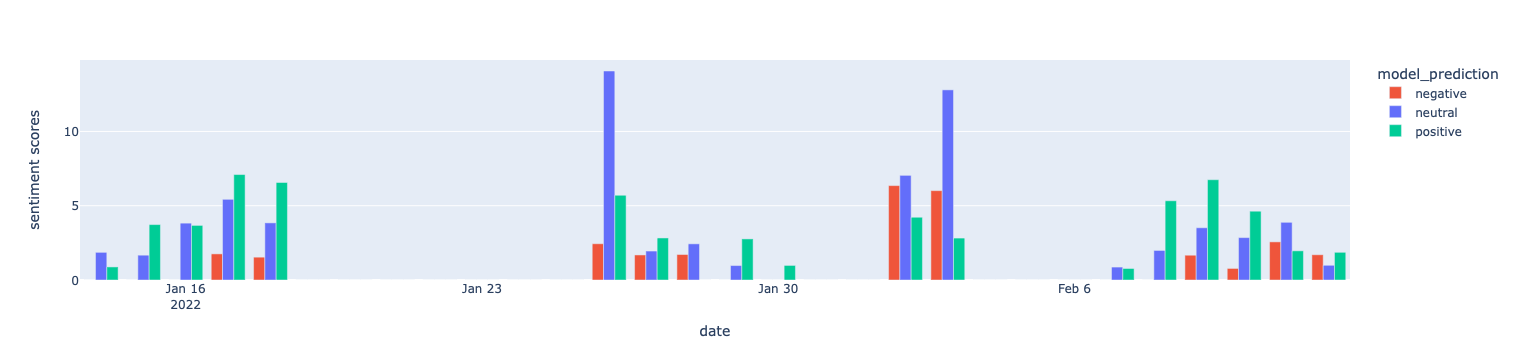

In [15]:
px.bar(pipeline.summary(), 
       barmode="group", 
       labels={"value": "sentiment scores"},
       color_discrete_sequence=[px.colors.qualitative.Plotly[1], 
                                px.colors.qualitative.Plotly[0],
                                px.colors.qualitative.Plotly[2]])